In [1]:
##############################################################################################################
# DESCRIPTION: Carga un modelo.
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 64
IMG_HEIGHT = 64

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-aeconnect-b"

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsK as reports
import keras.models

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000
Noisy files:9696
Nitid files:9696
Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000\validation
Noisy files:2309
Nitid files:2309


In [7]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL)), compile=False)

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Images count =2309
Best RMSENZ  =2122 (0.92)
Best MAENZ   =2125 (0.92)
Best Accuracy=2030 (0.88)
RMSE-NZ  Pred=0.0234  Noisy=0.0943
MAE-NZ   Pred=0.0198  Noisy=0.0904
PSNR     Pred=20.2 dB Noisy=9.3 dB
Accuracy Pred=0.40    Noisy=0.09
SSM      Pred=0.95    Noisy=0.64
HOG MSE  Pred=0.09    Noisy=0.12


In [9]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )
reports.saveScores( DEST_TESTS, SAVED_MODEL, predictions_metrics )

Read dataset. Path: C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test/
Noisy files:128
Nitid files:128
Index:0
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_0_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_0_nitid_idx134.tif


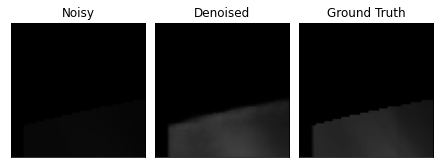

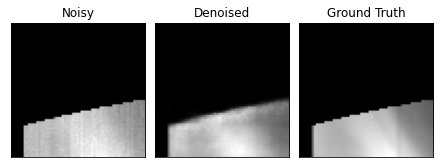

RMSE-NZ  Pred=0.0198  Noisy=0.1136 BEST
MAE-NZ   Pred=0.0103  Noisy=0.1102 BEST
PSNR     Pred=20.5 dB Noisy=5.3 dB BEST
Accuracy Pred=0.71    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.75
HOG MSE  Pred=0.14    Noisy=0.08
******************************************************
Index:1
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_10_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_10_nitid_idx134.tif


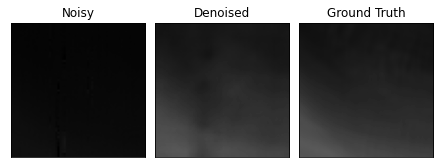

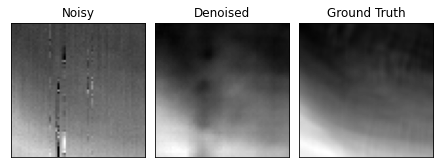

RMSE-NZ  Pred=0.0180  Noisy=0.1361 BEST
MAE-NZ   Pred=0.0155  Noisy=0.1225 BEST
PSNR     Pred=25.8 dB Noisy=8.2 dB BEST
Accuracy Pred=0.31    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.37
HOG MSE  Pred=0.06    Noisy=0.15
******************************************************
Index:2
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_11_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_11_nitid_idx134.tif


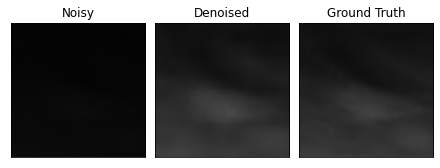

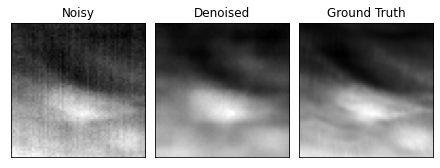

RMSE-NZ  Pred=0.0117  Noisy=0.1187 BEST
MAE-NZ   Pred=0.0091  Noisy=0.1077 BEST
PSNR     Pred=26.8 dB Noisy=6.8 dB BEST
Accuracy Pred=0.64    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.40
HOG MSE  Pred=0.04    Noisy=0.08
******************************************************
Index:3
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_12_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_12_nitid_idx134.tif


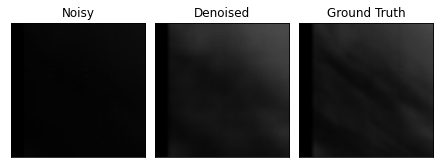

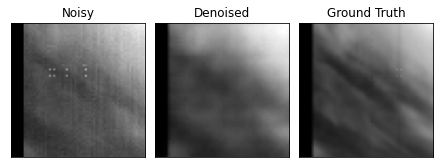

RMSE-NZ  Pred=0.0163  Noisy=0.0947 BEST
MAE-NZ   Pred=0.0120  Noisy=0.0830 BEST
PSNR     Pred=25.4 dB Noisy=10.1 dB BEST
Accuracy Pred=0.55    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.39
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:4
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_13_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_13_nitid_idx134.tif


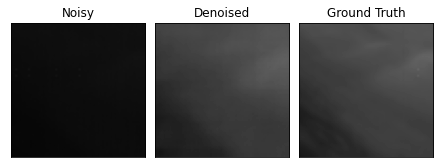

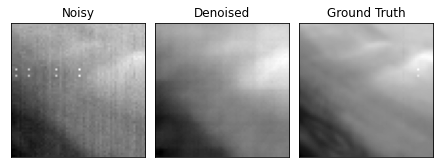

RMSE-NZ  Pred=0.0201  Noisy=0.2117 BEST
MAE-NZ   Pred=0.0181  Noisy=0.2063 BEST
PSNR     Pred=25.8 dB Noisy=5.4 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.37
HOG MSE  Pred=0.05    Noisy=0.20
******************************************************
Index:5
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_14_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_14_nitid_idx134.tif


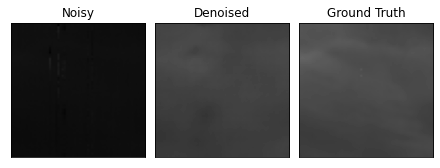

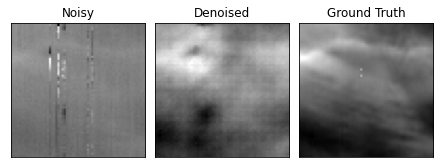

RMSE-NZ  Pred=0.0359  Noisy=0.2330 BEST
MAE-NZ   Pred=0.0332  Noisy=0.2317 BEST
PSNR     Pred=20.7 dB Noisy=4.5 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.41
HOG MSE  Pred=0.07    Noisy=0.10
******************************************************
Index:6
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_15_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_15_nitid_idx134.tif


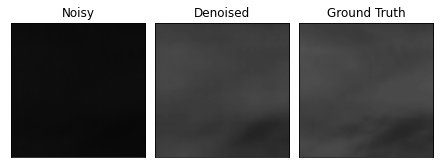

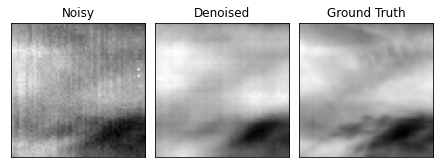

RMSE-NZ  Pred=0.0189  Noisy=0.2065 BEST
MAE-NZ   Pred=0.0172  Noisy=0.2048 BEST
PSNR     Pred=24.4 dB Noisy=3.6 dB BEST
Accuracy Pred=0.18    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.39
HOG MSE  Pred=0.02    Noisy=0.11
******************************************************
Index:7
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_1_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_1_nitid_idx134.tif


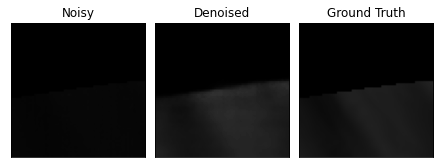

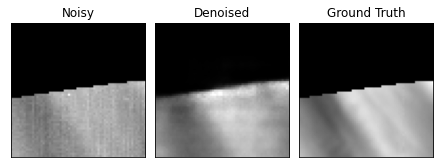

RMSE-NZ  Pred=0.0208  Noisy=0.0697 BEST
MAE-NZ   Pred=0.0141  Noisy=0.0669 BEST
PSNR     Pred=16.9 dB Noisy=6.4 dB BEST
Accuracy Pred=0.49    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.67
HOG MSE  Pred=0.10    Noisy=0.06
******************************************************
Index:8
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_2_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_2_nitid_idx134.tif


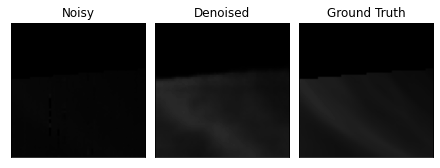

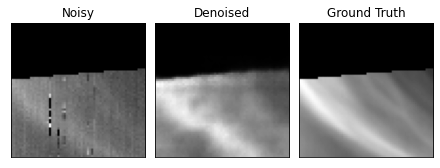

RMSE-NZ  Pred=0.0159  Noisy=0.0660 BEST
MAE-NZ   Pred=0.0114  Noisy=0.0626 BEST
PSNR     Pred=19.5 dB Noisy=7.1 dB BEST
Accuracy Pred=0.51    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.63
HOG MSE  Pred=0.13    Noisy=0.10
******************************************************
Index:9
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_3_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_3_nitid_idx134.tif


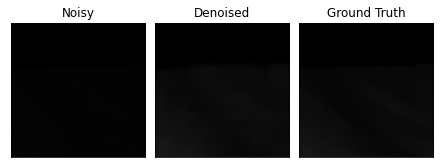

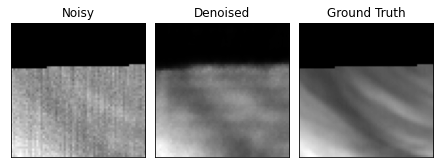

RMSE-NZ  Pred=0.0074  Noisy=0.0283 BEST
MAE-NZ   Pred=0.0055  Noisy=0.0260 BEST
PSNR     Pred=21.8 dB Noisy=10.1 dB BEST
Accuracy Pred=0.80    Noisy=0.01 BEST
SSM      Pred=0.96    Noisy=0.71
HOG MSE  Pred=0.12    Noisy=0.13
******************************************************
Index:10
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_4_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_4_nitid_idx134.tif


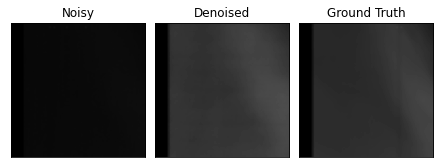

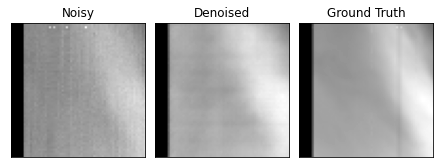

RMSE-NZ  Pred=0.0311  Noisy=0.1519 BEST
MAE-NZ   Pred=0.0287  Noisy=0.1492 BEST
PSNR     Pred=18.9 dB Noisy=5.1 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.30
HOG MSE  Pred=0.05    Noisy=0.06
******************************************************
Index:11
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_5_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_5_nitid_idx134.tif


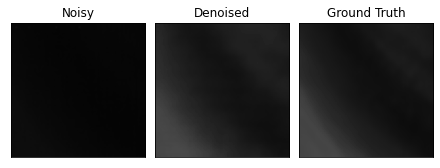

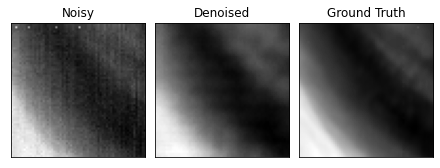

RMSE-NZ  Pred=0.0165  Noisy=0.0993 BEST
MAE-NZ   Pred=0.0148  Noisy=0.0857 BEST
PSNR     Pred=24.7 dB Noisy=9.1 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.39
HOG MSE  Pred=0.11    Noisy=0.26
******************************************************
Index:12
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_6_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_6_nitid_idx134.tif


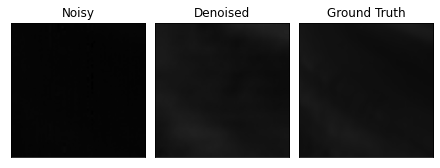

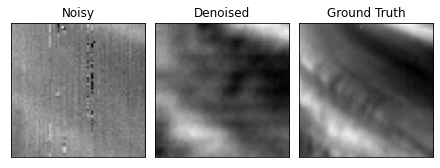

RMSE-NZ  Pred=0.0119  Noisy=0.0521 BEST
MAE-NZ   Pred=0.0097  Noisy=0.0506 BEST
PSNR     Pred=19.6 dB Noisy=6.8 dB BEST
Accuracy Pred=0.60    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.47
HOG MSE  Pred=0.06    Noisy=0.14
******************************************************
Index:13
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_7_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_7_nitid_idx134.tif


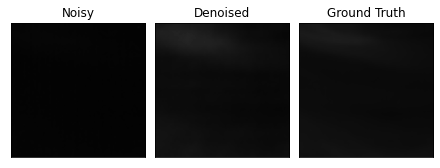

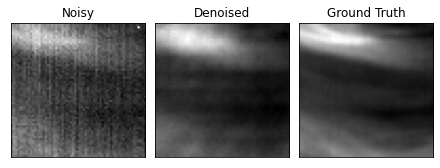

RMSE-NZ  Pred=0.0101  Noisy=0.0408 BEST
MAE-NZ   Pred=0.0069  Noisy=0.0387 BEST
PSNR     Pred=20.8 dB Noisy=8.7 dB BEST
Accuracy Pred=0.80    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.55
HOG MSE  Pred=0.08    Noisy=0.36
******************************************************
Index:14
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_8_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_8_nitid_idx134.tif


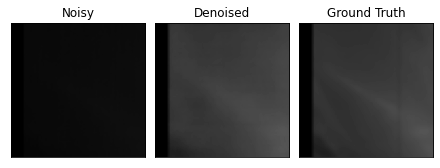

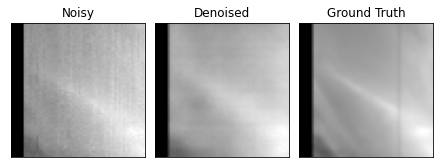

RMSE-NZ  Pred=0.0177  Noisy=0.1798 BEST
MAE-NZ   Pred=0.0157  Noisy=0.1769 BEST
PSNR     Pred=25.4 dB Noisy=5.3 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.31
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************
Index:15
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_9_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0112_01_02_9_nitid_idx134.tif


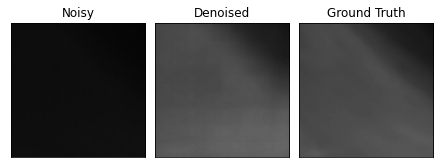

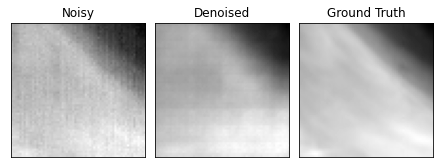

RMSE-NZ  Pred=0.0311  Noisy=0.2214 BEST
MAE-NZ   Pred=0.0255  Noisy=0.2154 BEST
PSNR     Pred=21.0 dB Noisy=4.0 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.32
HOG MSE  Pred=0.04    Noisy=0.18
******************************************************
Index:16
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0127_01_02_0_noisy_idx123.tif
C:\Projects\VenusDenoise\dataset\cases\64\0100_1000/test\VI0127_01_02_0_nitid_idx134.tif


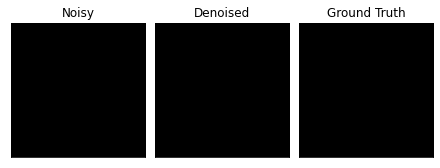

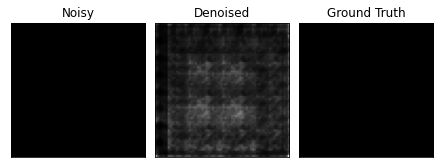

Black image. Cannot calculate accurayNoZeros


SystemExit: -1

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )

In [ ]:
test_indexes = np.array([2])
reports.predictByIndexes( model, val_noisy, val_nitid, val_noisy_files, val_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD, \
                        save_pred = True, save_folder_name = DEST_TESTS )